In [2]:
import numpy as np

from imageruler import imageruler
from matplotlib import pyplot as plt

from imageruler.regular_shapes import disc, rounded_square, stripe # Import functions that generate regular shapes.

Examples based on regular 2d shapes are as follows.

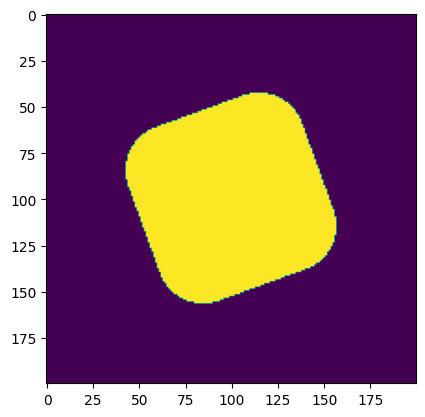

Declared minimum length scale of the solid region:  50
Estimated minimum length scale of the solid region:  50.9443359375


In [3]:
resolution = 1  # number of pixels per unit length
phys_size = (200, 200)  # physical size of the entire image
declared_mls = 50  # declared minimum length scale

image = rounded_square(resolution, phys_size, declared_mls, angle=20)  # generate a rounded square

plt.figure()
plt.imshow(image)
plt.show()

solid_mls = imageruler.minimum_length_solid(image)  # estimate the minimum length scale of the solid region
print("Declared minimum length scale of the solid region: ", declared_mls)
print("Estimated minimum length scale of the solid region: ", solid_mls)

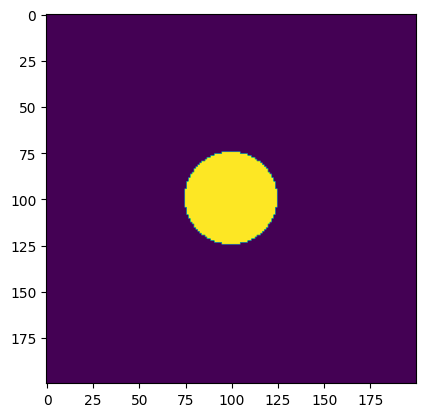

Declared minimum length scale of the solid region:  50
Estimated minimum length scale of the solid region:  49.0009765625


In [4]:
diameter = 50
image = disc(resolution, phys_size, diameter)  # generate a disc

plt.figure()
plt.imshow(image)
plt.show()

solid_mls = imageruler.minimum_length_solid(image)  # estimate the minimum length scale of the solid region
print("Declared minimum length scale of the solid region: ", diameter)
print("Estimated minimum length scale of the solid region: ", solid_mls)

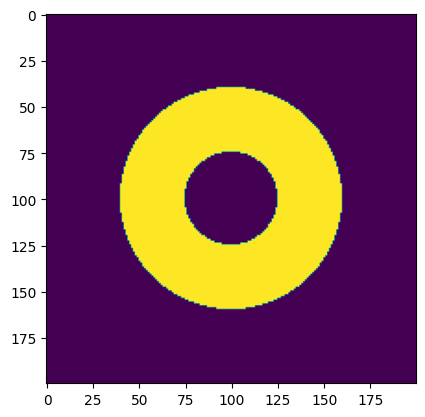

Declared minimum length scale:  35.0 (solid),  50 (void)
Estimated minimum length scale:  35.0087890625 (solid),  49.0009765625 (void),  35.0087890625 (minimum)


In [5]:
outer_diameter, inner_diameter = 120, 50
declared_solid_mls, declared_void_mls = (outer_diameter - inner_diameter) / 2, inner_diameter

solid_disc = disc(resolution, phys_size, diameter=outer_diameter)
void_disc = disc(resolution, phys_size, diameter=inner_diameter)
image = solid_disc ^ void_disc  # ring

plt.figure()
plt.imshow(image)
plt.show()

solid_mls = imageruler.minimum_length_solid(image)
void_mls = imageruler.minimum_length_void(image)
mls = imageruler.minimum_length(image)

print("Declared minimum length scale: ", declared_solid_mls, "(solid), ", declared_void_mls, "(void)")
print("Estimated minimum length scale: ", solid_mls, "(solid), ", void_mls, "(void), ", mls, "(minimum)")

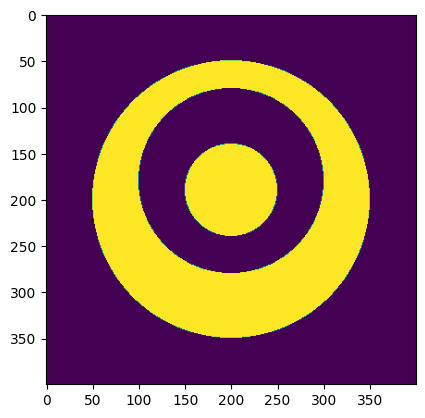

Declared minimum length scale:  30 (solid),  40 (void)
Estimated minimum length scale:  30.41845703125 (solid),  40.54931640625 (void),  30.41845703125 (minimum)


In [6]:
resolution = 1  # number of pixels per unit length
phys_size = (400, 400)  # physical size of the entire image

outer_diameter, middle_diameter, inner_diameter = 300, 200, 100
declared_solid_mls, declared_void_mls = (
    outer_diameter - inner_diameter) / 2, inner_diameter

outer_solid_disc = disc(resolution, phys_size, diameter=outer_diameter, center= (0, 0))
void_disc = disc(resolution, phys_size, diameter=middle_diameter, center= (-20, 0))
inner_solid_disc = disc(resolution, phys_size, diameter=inner_diameter, center= (-10, 0))
image = outer_solid_disc^void_disc^inner_solid_disc

plt.figure()
plt.imshow(image)
plt.show()

solid_mls = imageruler.minimum_length_solid(image)
void_mls = imageruler.minimum_length_void(image)
mls = imageruler.minimum_length(image)
print("Declared minimum length scale: ", 30, "(solid), ", 40, "(void)")
print("Estimated minimum length scale: ", solid_mls, "(solid), ", void_mls, "(void), ", mls, "(minimum)")

The images that illustrate the areas of violation at various probe diameters are shown as follows. The three rows from top to bottom show violations at solid, void, and either region.

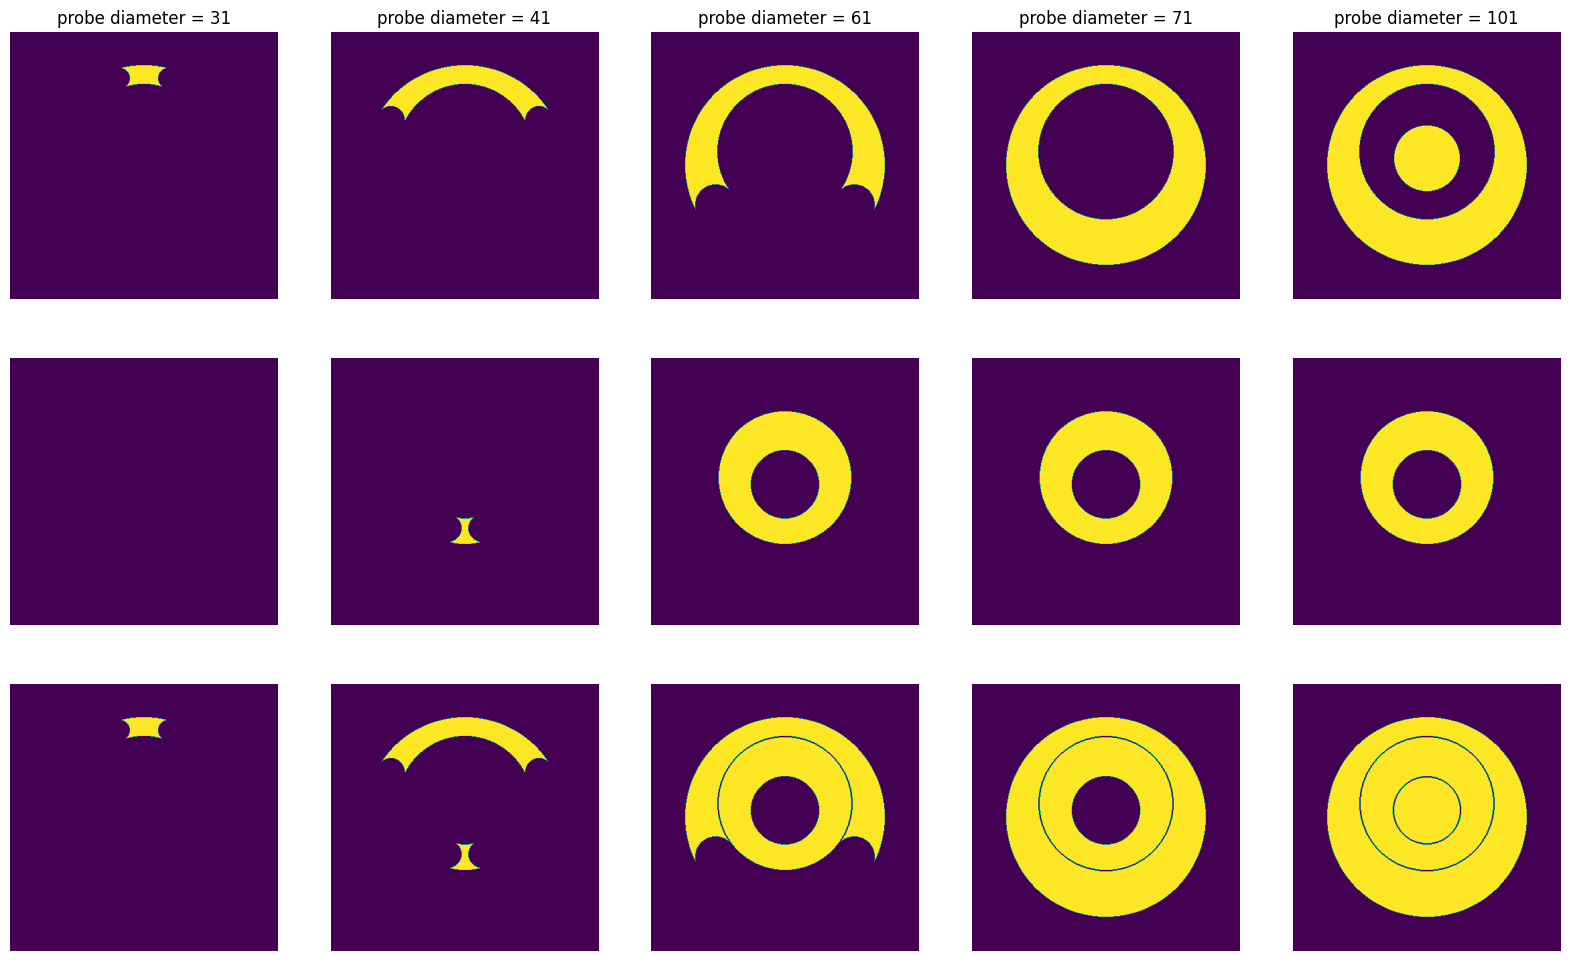

In [7]:
diameters = [31,41,61,71,101]
nd = len(diameters)
plt.figure(figsize=(20,12))

for idx in range(nd):

    plt.subplot(3,nd,idx+1)
    ax = plt.gca()
    ax.set_axis_off()
    image_violation_solid = imageruler.length_violation_solid(image,diameter=diameters[idx])
    plt.imshow(image_violation_solid)
    plt.title("probe diameter = "+str(diameters[idx]))

    plt.subplot(3,nd,nd+idx+1)
    ax = plt.gca()
    ax.set_axis_off()
    image_violation_void = imageruler.length_violation_void(image,diameter=diameters[idx])
    plt.imshow(image_violation_void)

    plt.subplot(3,nd,2*nd+idx+1)
    ax = plt.gca()
    ax.set_axis_off()
    image_violation = imageruler.length_violation(image,diameter=diameters[idx])
    plt.imshow(image_violation);

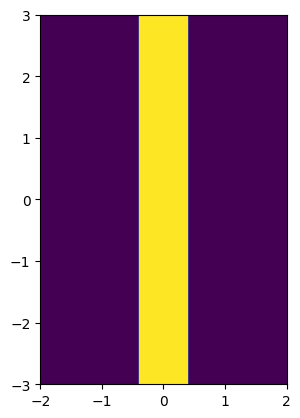

Declared minimum length scale of the solid region:  0.8
Estimated minimum length scale of the solid region:  0.8090039062499998


In [8]:
resolution = 50
width, height = 6, 4  # size of the binary image
phys_size = (width, height)

stripe_width = 0.8
image = stripe(resolution, phys_size, stripe_width)

plt.figure()
plt.imshow(image,extent=[-phys_size[1]/2,phys_size[1]/2,-phys_size[0]/2,phys_size[0]/2])
plt.show()

solid_mls = imageruler.minimum_length_solid(image, phys_size)

print("Declared minimum length scale of the solid region: ", stripe_width)
print("Estimated minimum length scale of the solid region: ", solid_mls)

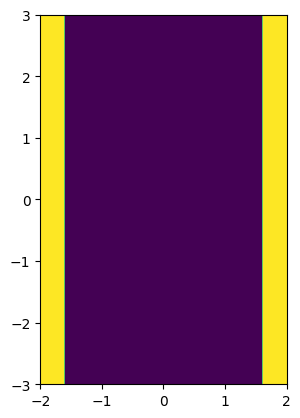

Declared minimum length scale of the solid region:  0.8
Estimated minimum length scale of the solid region:  0.811298828125


In [9]:
image = stripe(resolution, phys_size, stripe_width, center = (0, -2)) | stripe(
    resolution, phys_size, stripe_width, center = (0, 2))

plt.figure()
plt.imshow(image,extent=[-phys_size[1]/2,phys_size[1]/2,-phys_size[0]/2,phys_size[0]/2])
plt.show()

# Assume this image is periodic along the horizontal direction, which corresponds to the axis 1.
solid_mls = imageruler.minimum_length(image, phys_size, periodic_axes=1)

print("Declared minimum length scale of the solid region: ", stripe_width)
print("Estimated minimum length scale of the solid region: ", solid_mls)

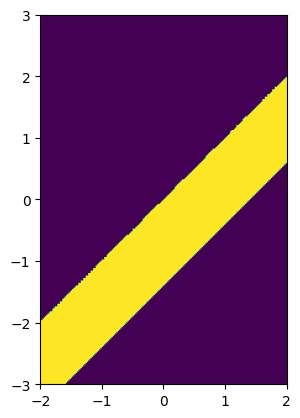

Declared minimum length scale of the solid region:  1
Estimated minimum length scale of the solid region:  0.9877929687499998


In [10]:
stripe_width,intercept,angle = 1,1/np.sqrt(2),0.25*np.pi
image = stripe(resolution, phys_size, stripe_width, center=(intercept,0), angle=135)

plt.figure()
plt.imshow(image,extent=[-phys_size[1]/2,phys_size[1]/2,-phys_size[0]/2,phys_size[0]/2])
plt.show()

solid_mls = imageruler.minimum_length_solid(image, phys_size)

print("Declared minimum length scale of the solid region: ", stripe_width)
print("Estimated minimum length scale of the solid region: ", solid_mls)

Padding schemes can affect estimated minimum length scales. The default padding schemes are padding solid/void materials when estimating minimum length scales of solid/void regions and padding solid/void materials for morphological opening/closing in the dual approach that involves both openning and closing. In the preceding example, if we use void padding or edge-mode padding, the boundary stuctures will influence the estimated minimum length scale, and consequently, the results will be away from the width of the strip. 

In [11]:
solid_mls_void = imageruler.minimum_length_solid(image, phys_size, pad_mode=imageruler.PaddingMode.VOID)
solid_mls_edge = imageruler.minimum_length_solid(image, phys_size, pad_mode=imageruler.PaddingMode.EDGE)
print("Estimated minimum length scale of the solid region: ", solid_mls_void, "(void padding), ", solid_mls_edge, "(edge-mode padding)")

Estimated minimum length scale of the solid region:  0.08607421875 (void padding),  0.7079492187499998 (edge-mode padding)


Some tests based on 1d images are as follows.

Estimated minimum length scales:  0.39999999999999997 (solid),  0.3 (void)
Estimated minimum length scales with some end regions disregarded:  0.9999999999999999 (solid),  2.0999999999999996 (void)


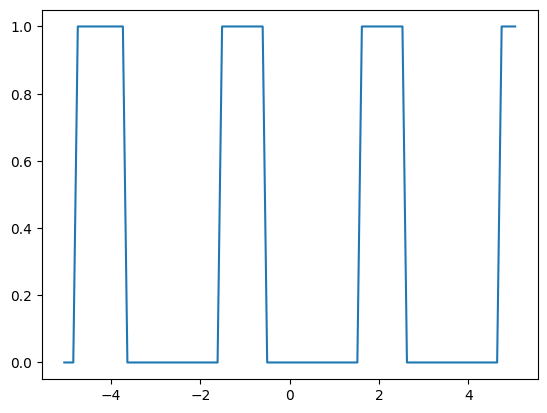

In [12]:
phys_size = 10.1
image = np.sin(np.linspace(0,100,101)/5) > 0.5
plt.plot(np.linspace(-phys_size/2,phys_size/2,len(image)),image);

solid_mls, void_mls = imageruler.minimum_length_solid_void(image, phys_size)
print("Estimated minimum length scales: ", solid_mls, "(solid), ", void_mls, "(void)")

# disregard the short void and solid regions at both ends
solid_mls, void_mls = imageruler.minimum_length_solid_void(image, phys_size, margin_size=(void_mls,solid_mls))
print("Estimated minimum length scales with some end regions disregarded: ", solid_mls, "(solid), ", void_mls, "(void)")

This package can also be used via the command line, which allows you to invoke the function "minimum_length_solid_void()" being invoked. The syntax is "imageruler file", where "file" is a string of the path of the text file that contains the array of the input image. All other arguments of the function take default options.